In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

La trayectoria del cuerpo secundario, cuya masa es $m_3$, obedece al siguiente sistema de ecuaciones:

$$ x'' - 2y' = \partial_x \Phi $$

$$ y'' + 2x' = \partial_y \Phi $$

Las masas de los cuerpos primarios cumplen $m_1+m_2 = 1$ y escribimos todo en términos de $\mu = m_2$. 

$z_1 = (-\mu,0)$ 

$z_2 = (1-\mu,0)$ 

El gradiente del potencial es:

$$ \nabla \Phi(x,y) = (x,y) - \dfrac{1-\mu}{|z-z_1|^3}(x+\mu, y) - \dfrac{\mu}{|z-z_2|^3}(x+\mu-1,y) $$

en donde:

$$ |z-z_1|^3 = [(x+\mu)^2+y^2]^{3/2} $$

$$ |z-z_2|^3 = [(x+\mu-1)^2+y^2]^{3/2} $$

y así, el sistema queda como:

$ x'' = 2y' + x - \dfrac{1-\mu}{|z-z_1|^3}(x+\mu)-\dfrac{\mu}{|z-z_2|^3}(x+\mu-1) $

$ y'' = -2x' + y - \dfrac{1-\mu}{|z-z_1|^3}(y)-\dfrac{\mu}{|z-z_2|^3}(y)  $

el cual resolveremos planteándolo como un sistema de primer orden.

$ x' = v_x $

$ v_x' = 2v_y + x - \dfrac{1-\mu}{|z-z_1|^3 }(x+\mu)-\dfrac{\mu}{|z-z_2|^3 }(x+\mu-1) $

$ y' = v_y $

$ v_y' = -2v_x + y - \dfrac{1-\mu}{|z-z_1|^3 }(y)-\dfrac{\mu}{|z-z_2|^3 }(y)  $

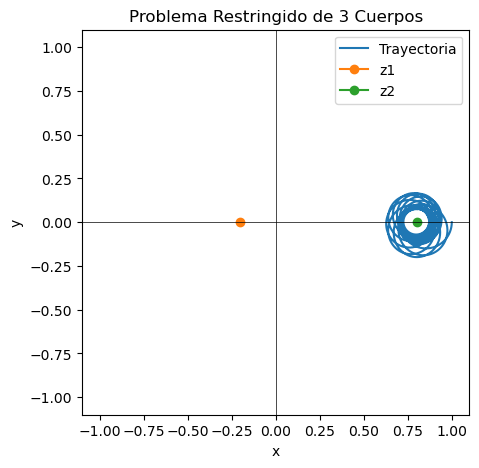

In [2]:
#--------------------------------------------#
#---Las Ecuaciones y sus Valores Iniciales---#
#--------------------------------------------#

def S(t, z, mu):
    x, vx, y, vy = z
    z_z1 = sqrt((x+mu)**2 + y**2) # z-z1
    z_z2 = sqrt((x+mu-1)**2 + y**2) # z-z2
    #-------------------------------------
    dx = vx
    dvx = 2*vy + x -(1-mu)*(x+mu)/(z_z1**3) - mu*(x+mu-1)/(z_z2**3)
    dy = vy
    dvy = -2*vx + y -(1-mu)*(y)/(z_z1**3) - mu*(y)/(z_z2**3)
    #--------------------------------------------------------------
    return [dx, dvx, dy, dvy]

# Posiciones y velocidades iniciales
x0 = 1.0
vx0 = 0.0
y0 = 0.0
vy0 = -1.0
#--------------------------------
mu = 0.2 # Aquí define la masa mu

#-------------#
#---Dominio---#
#-------------#
t0 = 0.0
tf = 10.0
N = 5000

# Esto es una solución pero quién sabe con cuántos puntos
sol = solve_ivp(S, [t0, tf], [x0, vx0, y0,vy0], args=(mu,), dense_output=True)

# Definiéndo ésto ya especifícas cuántos puntos quieres
t = np.linspace(t0, tf, N)
z = sol.sol(t)

x = z[0]
vx = z[1]
y = z[2]
vy = z[3]

# Graficamos
plt.figure(figsize=(5,5))
# Ajuste de límites para hacer que los ejes tengan el mismo intervalo
max_range = max(max(x), max(y)) * 1.1
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)

plt.plot(x, y, label='Trayectoria')  # Agregamos la etiqueta 'trayectoria'

#---Cuerpos Primarios---
plt.plot(-mu,0, marker="o", label='z1')
plt.plot(1-mu,0, marker="o", label='z2')

#---Ejes---
plt.axhline(0, color='black', linewidth=0.5)  # Marca el eje y
plt.axvline(0, color='black', linewidth=0.5)  # Marca el eje x
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.title('Problema Restringido de 3 Cuerpos')
plt.show()